In [3]:
import pandas as pd
import numpy as np
import extracted_data_reader
from tsai.all import *

In [4]:
X = np.array(extracted_data_reader.read_data_ex(ex_number=1, frame_number="mean"))
Y = extracted_data_reader.read_target_ex(ex_number=1)

y  = np.array([ o[0] for o in Y ])
y

229
229


array([4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 5, 5, 5, 5, 5, 5, 5, 5])

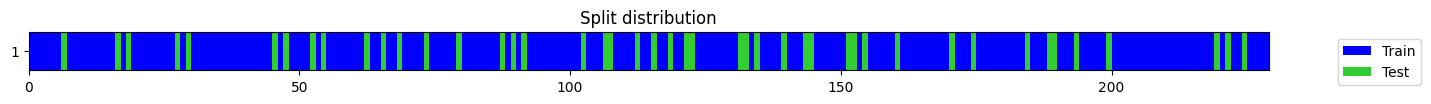

(array([[[0.48760059, 0.48869166, 0.48911598, ..., 0.48711669,
          0.48698959, 0.48698813],
         [0.79618263, 0.79551679, 0.7949307 , ..., 0.79528277,
          0.79544148, 0.79537161],
         [0.53347266, 0.53354591, 0.53357679, ..., 0.53435498,
          0.53427452, 0.53423345],
         ...,
         [0.43789268, 0.43818015, 0.43838632, ..., 0.43834305,
          0.43824553, 0.43818671],
         [0.45725259, 0.45756838, 0.45771769, ..., 0.45885152,
          0.4588401 , 0.45883453],
         [0.43535894, 0.43590206, 0.43624312, ..., 0.43549407,
          0.43519914, 0.43510383]],
 
        [[0.48696658, 0.48691085, 0.48698398, ..., 0.48895651,
          0.48831305, 0.48771161],
         [0.79537793, 0.79495226, 0.79467876, ..., 0.79175133,
          0.79176039, 0.79159333],
         [0.53418452, 0.53376025, 0.53347504, ..., 0.53275448,
          0.5325833 , 0.53213829],
         ...,
         [0.43794692, 0.43795824, 0.43812072, ..., 0.43838656,
          0.43776447, 0.

In [5]:
X = np.array(X)
# Y = np.array(Y)
splits = get_splits(y, valid_size=.2, stratify=True, n_splits=1, shuffle=True)
X, y, splits

In [6]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

(#229) [(TSTensor(vars:18, len:164, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:18, len:164, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:18, len:164, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:18, len:164, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:18, len:164, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:18, len:164, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:18, len:164, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:18, len:164, device=cpu, dtype=torch.float32), TensorCategory(3)), (TSTensor(vars:18, len:164, device=cpu, dtype=torch.float32), TensorCategory(4)), (TSTensor(vars:18, len:164, device=cpu, dtype=torch.float32), TensorCategory(4))] ...]

In [7]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=[TSStandardize()], num_workers=0)

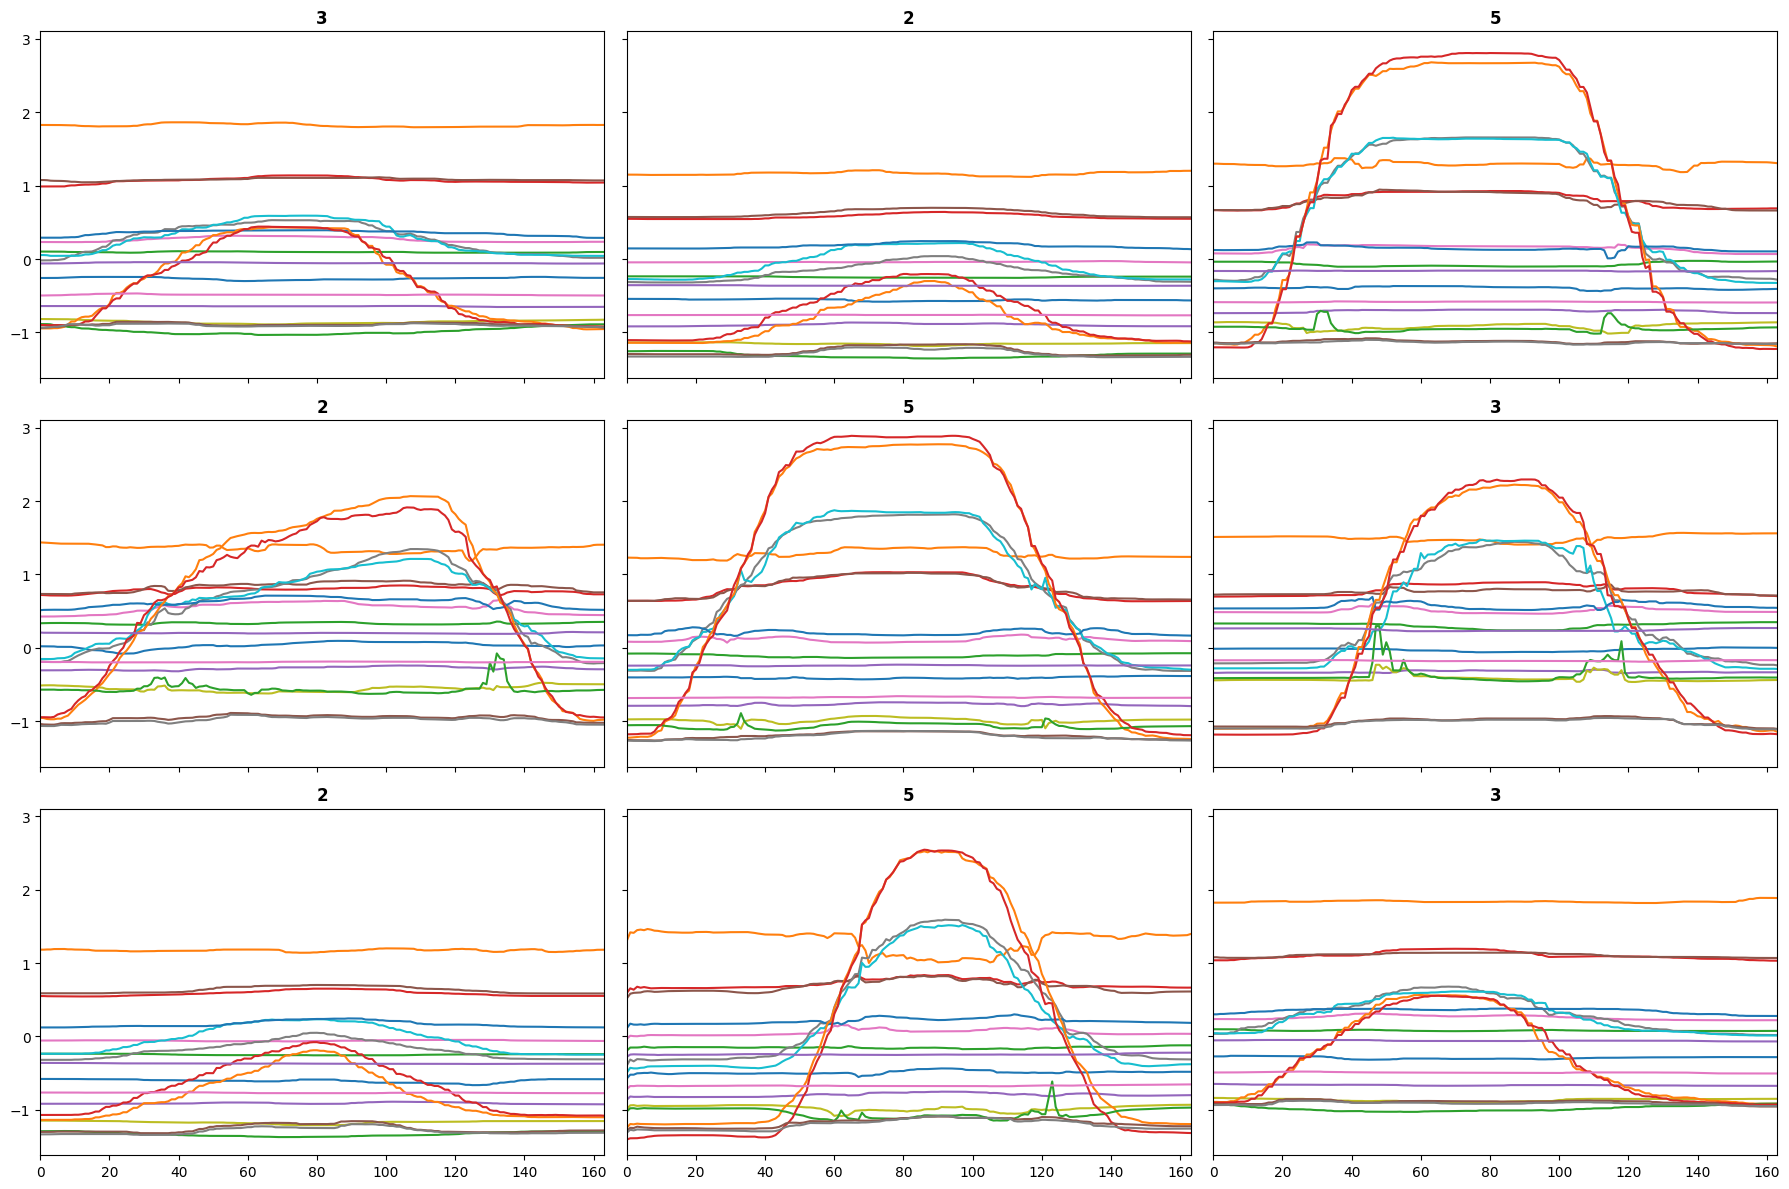

In [8]:
dls.show_batch(sharey=True)

In [10]:
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, metrics=accuracy)
learn.save('stage0')

Path('models/stage0.pth')

SuggestedLRs(valley=0.0002754228771664202)

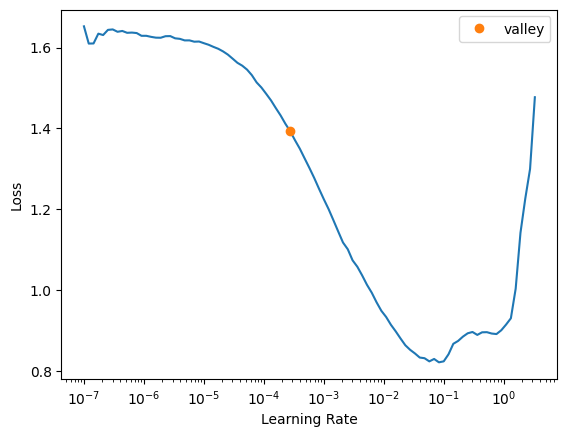

In [11]:
learn.load('stage0')
learn.lr_find()

In [12]:
learn.fit_one_cycle(25, lr_max=1e-3)
learn.save('stage1')

epoch,train_loss,valid_loss,accuracy,time
0,1.608282,1.587491,0.155556,00:03
1,1.510236,1.582605,0.133333,00:03
2,1.377795,1.576635,0.266667,00:03
3,1.248881,1.565145,0.422222,00:03
4,1.134915,1.546372,0.422222,00:03
5,1.028184,1.525707,0.422222,00:03
6,0.937517,1.486318,0.444444,00:03
7,0.861497,1.425488,0.444444,00:03
8,0.783328,1.296692,0.555556,00:03
9,0.716587,1.200500,0.644444,00:03


Path('models/stage1.pth')

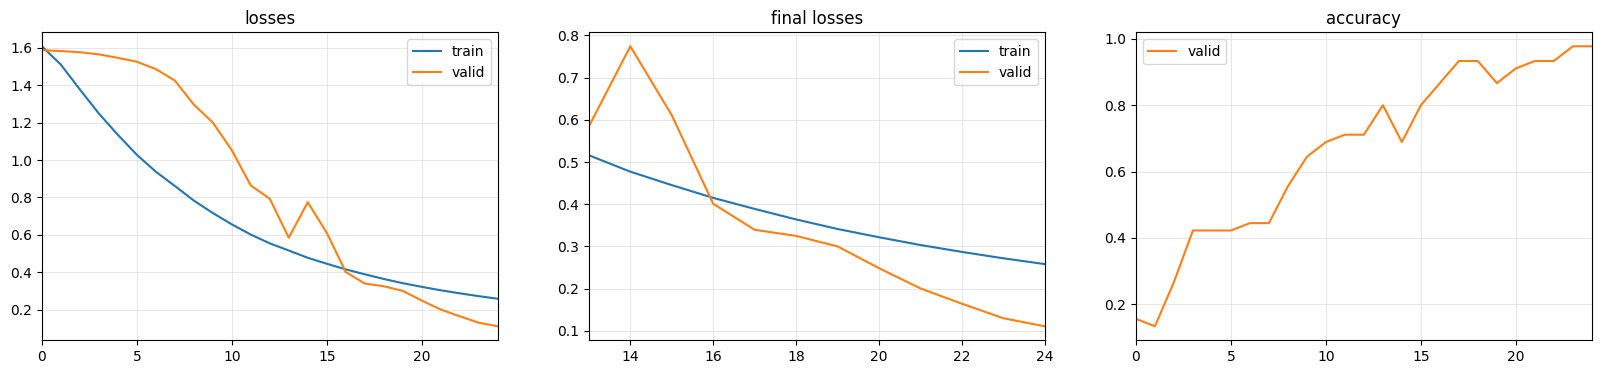

In [13]:
learn.recorder.plot_metrics()

In [15]:
learn.save_all(path='models_export', dls_fname='goal_ex1_dls', model_fname='goal_ex1', learner_fname='goal_ex1_learner')

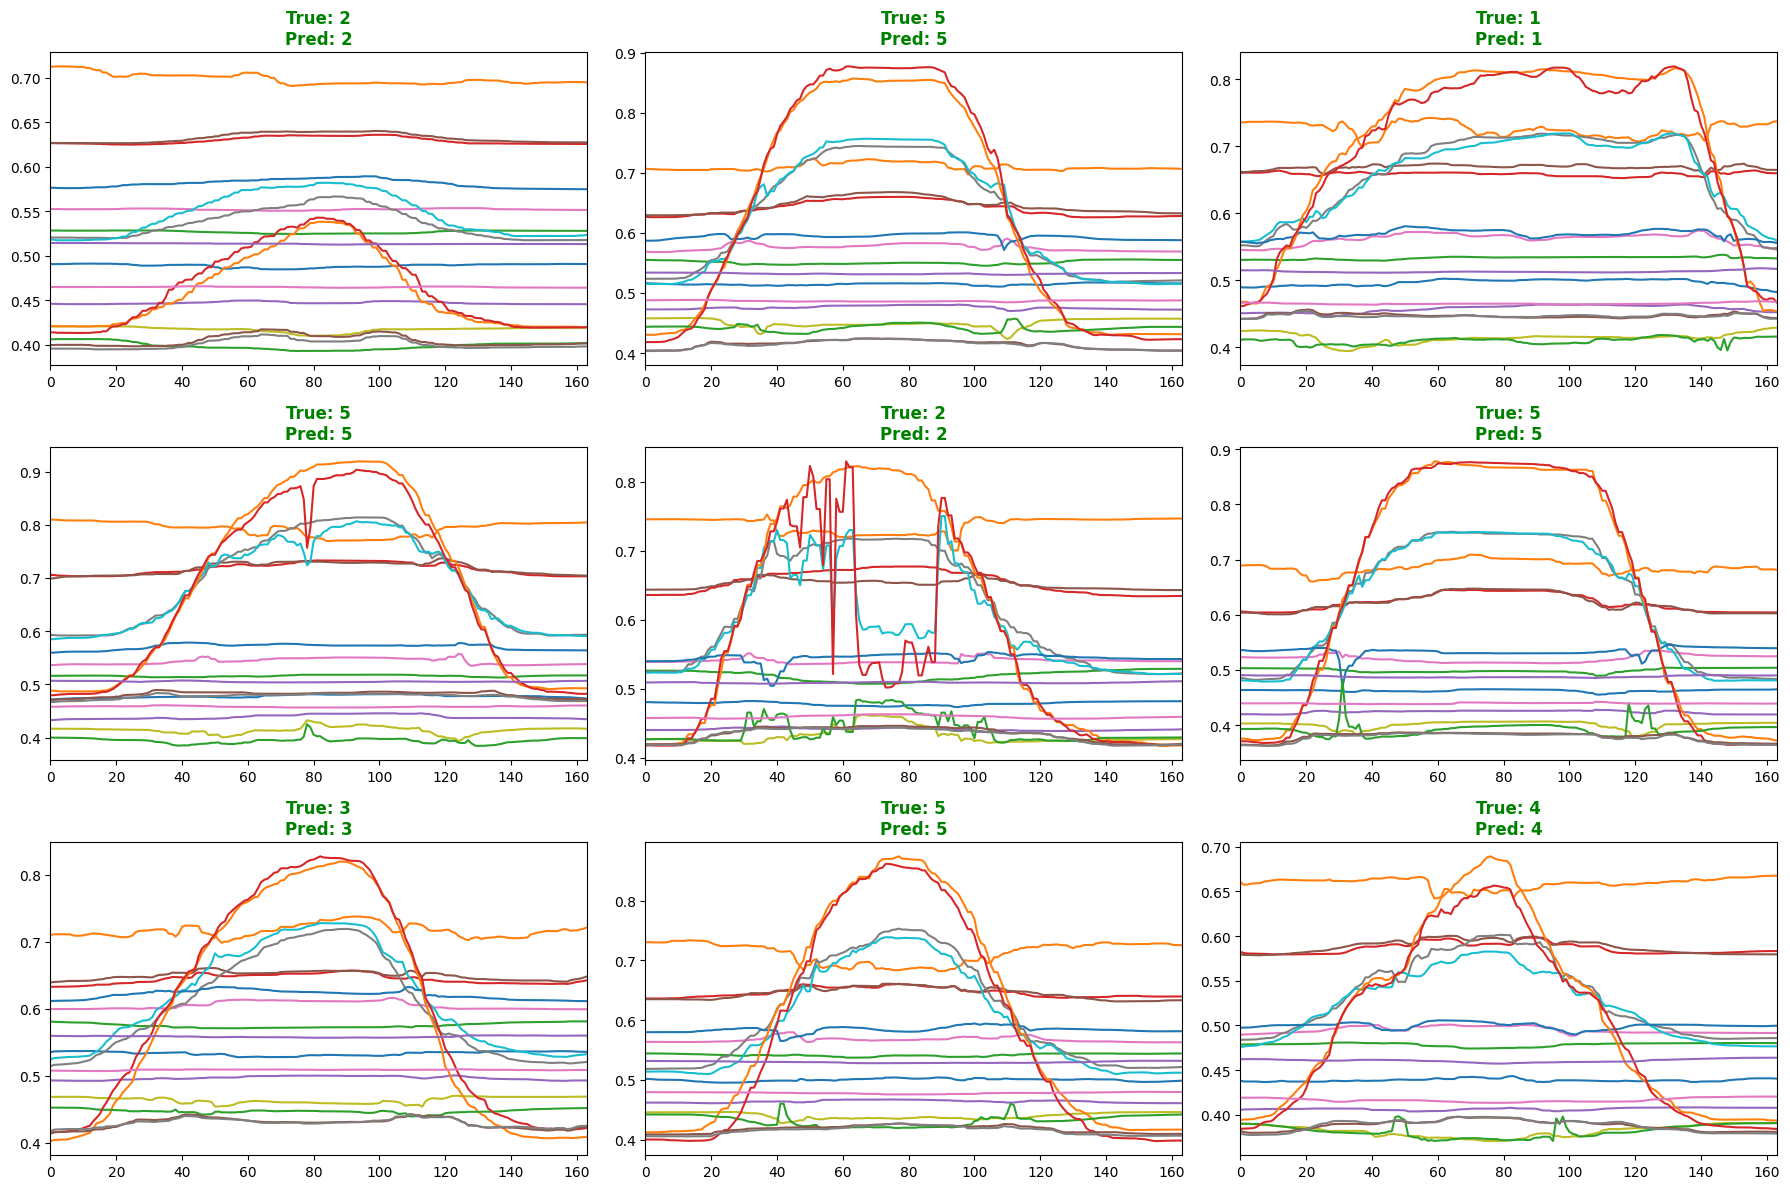

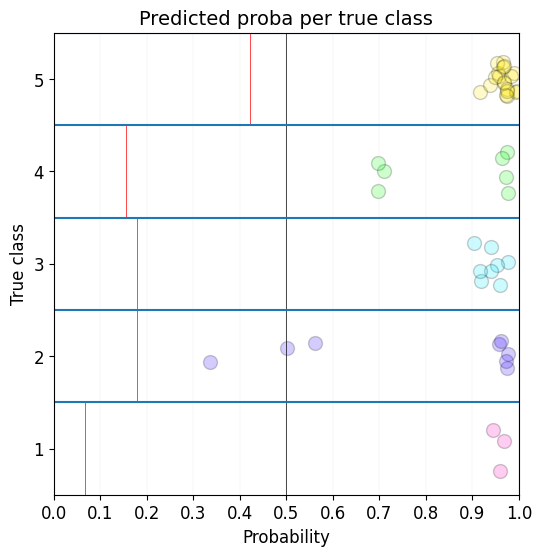

In [17]:
learn.show_results()
learn.show_probas()

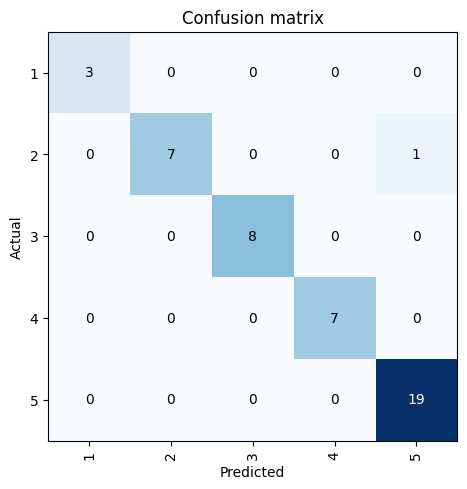

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()